In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import numpy as np
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [3]:
short_term_rentals = pd.read_csv('../data/Residential_Short_Term_Rental_Permits.csv')
print(short_term_rentals.shape)
short_term_rentals.head(3)

(14299, 27)


,Permit #,Applicant,Contact,Permit Subtype Description,Permit Status,Parcel,Date Entered,Date Issued,Expiration Date,Address,...,Permit Owner Addr. 2,Permit Owner Addr. 3,Permit Owner City,Permit Owner State,Permit Owner ZIP,Permit Type,Permit Subtype,Council District,Census Tract,Mapped Location
0,2022052402,Avery Owner 305 LLC,Stay Local Nashville,Short Term Rental � Multifamily,ISSUED,061030E30100CO,08/03/2022 12:00:00 AM,08/10/2022 12:00:00 AM,08/10/2023 12:00:00 AM,4810 GALLATIN PIKE 305,...,3848 Hutson Ave,NaN,Nashville,TN,37216,CASR,CAZ10A003,7.0,37011100,"4810 GALLATIN PIKE 305\nNASHVILLE, TN 37216\n(..."
1,201528484,"Schoenbrodt, Christa M.","Schoenbrodt, Christa M.",Short Term Rental - Owner Occupied,ISSUED,10408036300,07/07/2015 12:00:00 AM,07/07/2015 12:00:00 AM,07/07/2023 12:00:00 AM,1709 VILLA PL,...,1709 VILLA PL,NaN,NASHVILLE,TN,37212,CASR,CAZ10A001,17.0,37016300,"1709 VILLA PL\nNASHVILLE, TN 37212\n(36.137262..."
2,2021041773,"BLAIN, DONNA L.",149 Bonita Parkway,Short Term Rental � Multifamily,ISSUED,092100M01700CO,07/01/2021 12:00:00 AM,08/10/2021 12:00:00 AM,08/10/2023 12:00:00 AM,501 27TH AVE N 1,...,101 Affirmed Dr,NaN,Hendersonville,TN,37075,CASR,CAZ10A003,21.0,37014300,"501 27TH AVE N 1\nNASHVILLE, TN 37209\n(36.156..."


In [4]:
short_term_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14299 entries, 0 to 14298
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Permit #                    14299 non-null  object 
 1   Applicant                   14289 non-null  object 
 2   Contact                     13912 non-null  object 
 3   Permit Subtype Description  14299 non-null  object 
 4   Permit Status               14299 non-null  object 
 5   Parcel                      14299 non-null  object 
 6   Date Entered                14299 non-null  object 
 7   Date Issued                 13037 non-null  object 
 8   Expiration Date             14295 non-null  object 
 9   Address                     14299 non-null  object 
 10  City                        14298 non-null  object 
 11  State                       14298 non-null  object 
 12  ZIP                         14299 non-null  int64  
 13  Subdivision / Lot           142

In [5]:
short_term_rentals['Mapped Location'] = short_term_rentals['Mapped Location'].str.extract(r'\((.*)\)')
(short_term_rentals.head())

,Permit #,Applicant,Contact,Permit Subtype Description,Permit Status,Parcel,Date Entered,Date Issued,Expiration Date,Address,...,Permit Owner Addr. 2,Permit Owner Addr. 3,Permit Owner City,Permit Owner State,Permit Owner ZIP,Permit Type,Permit Subtype,Council District,Census Tract,Mapped Location
0,2022052402,Avery Owner 305 LLC,Stay Local Nashville,Short Term Rental � Multifamily,ISSUED,061030E30100CO,08/03/2022 12:00:00 AM,08/10/2022 12:00:00 AM,08/10/2023 12:00:00 AM,4810 GALLATIN PIKE 305,...,3848 Hutson Ave,NaN,Nashville,TN,37216,CASR,CAZ10A003,7.0,37011100,"36.232446, -86.724797"
1,201528484,"Schoenbrodt, Christa M.","Schoenbrodt, Christa M.",Short Term Rental - Owner Occupied,ISSUED,10408036300,07/07/2015 12:00:00 AM,07/07/2015 12:00:00 AM,07/07/2023 12:00:00 AM,1709 VILLA PL,...,1709 VILLA PL,NaN,NASHVILLE,TN,37212,CASR,CAZ10A001,17.0,37016300,"36.137262, -86.793042"
2,2021041773,"BLAIN, DONNA L.",149 Bonita Parkway,Short Term Rental � Multifamily,ISSUED,092100M01700CO,07/01/2021 12:00:00 AM,08/10/2021 12:00:00 AM,08/10/2023 12:00:00 AM,501 27TH AVE N 1,...,101 Affirmed Dr,NaN,Hendersonville,TN,37075,CASR,CAZ10A003,21.0,37014300,"36.156238, -86.81681"
3,201524751,"Heathman, Nancy A.",Nancy Heathman,Short Term Rental - Non-Owner Occupied,ISSUED,07210000500,06/16/2015 12:00:00 AM,06/16/2015 12:00:00 AM,06/16/2023 12:00:00 AM,1023 DOZIER PL,...,1023 DOZIER PL,NaN,NASHVILLE,TN,37216,CASR,CAZ10A002,5.0,37011400,"36.202549, -86.741512"
4,2017043768,"KINLEY, JOYCE & VICTOR",Robert Jackson Jr.,Short Term Rental - Owner Occupied,ISSUED,09203010500,07/05/2017 12:00:00 AM,08/30/2017 12:00:00 AM,08/30/2023 12:00:00 AM,2316 ALAMEDA ST,...,2316 ALAMEDA ST,NaN,NASHVILLE,TN,37208,CASR,CAZ10A001,21.0,37014300,"36.16651, -86.81179"


In [6]:
new=short_term_rentals['Mapped Location'].str.split(', ', n=1, expand=True)
short_term_rentals['lat']=new[0]
short_term_rentals['lng']=new[1]
short_term_rentals.head()


,Permit #,Applicant,Contact,Permit Subtype Description,Permit Status,Parcel,Date Entered,Date Issued,Expiration Date,Address,...,Permit Owner City,Permit Owner State,Permit Owner ZIP,Permit Type,Permit Subtype,Council District,Census Tract,Mapped Location,lat,lng
0,2022052402,Avery Owner 305 LLC,Stay Local Nashville,Short Term Rental � Multifamily,ISSUED,061030E30100CO,08/03/2022 12:00:00 AM,08/10/2022 12:00:00 AM,08/10/2023 12:00:00 AM,4810 GALLATIN PIKE 305,...,Nashville,TN,37216,CASR,CAZ10A003,7.0,37011100,"36.232446, -86.724797",36.232446,-86.724797
1,201528484,"Schoenbrodt, Christa M.","Schoenbrodt, Christa M.",Short Term Rental - Owner Occupied,ISSUED,10408036300,07/07/2015 12:00:00 AM,07/07/2015 12:00:00 AM,07/07/2023 12:00:00 AM,1709 VILLA PL,...,NASHVILLE,TN,37212,CASR,CAZ10A001,17.0,37016300,"36.137262, -86.793042",36.137262,-86.793042
2,2021041773,"BLAIN, DONNA L.",149 Bonita Parkway,Short Term Rental � Multifamily,ISSUED,092100M01700CO,07/01/2021 12:00:00 AM,08/10/2021 12:00:00 AM,08/10/2023 12:00:00 AM,501 27TH AVE N 1,...,Hendersonville,TN,37075,CASR,CAZ10A003,21.0,37014300,"36.156238, -86.81681",36.156238,-86.81681
3,201524751,"Heathman, Nancy A.",Nancy Heathman,Short Term Rental - Non-Owner Occupied,ISSUED,07210000500,06/16/2015 12:00:00 AM,06/16/2015 12:00:00 AM,06/16/2023 12:00:00 AM,1023 DOZIER PL,...,NASHVILLE,TN,37216,CASR,CAZ10A002,5.0,37011400,"36.202549, -86.741512",36.202549,-86.741512
4,2017043768,"KINLEY, JOYCE & VICTOR",Robert Jackson Jr.,Short Term Rental - Owner Occupied,ISSUED,09203010500,07/05/2017 12:00:00 AM,08/30/2017 12:00:00 AM,08/30/2023 12:00:00 AM,2316 ALAMEDA ST,...,NASHVILLE,TN,37208,CASR,CAZ10A001,21.0,37014300,"36.16651, -86.81179",36.16651,-86.81179


In [7]:
print(short_term_rentals.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14299 entries, 0 to 14298
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Permit #                    14299 non-null  object 
 1   Applicant                   14289 non-null  object 
 2   Contact                     13912 non-null  object 
 3   Permit Subtype Description  14299 non-null  object 
 4   Permit Status               14299 non-null  object 
 5   Parcel                      14299 non-null  object 
 6   Date Entered                14299 non-null  object 
 7   Date Issued                 13037 non-null  object 
 8   Expiration Date             14295 non-null  object 
 9   Address                     14299 non-null  object 
 10  City                        14298 non-null  object 
 11  State                       14298 non-null  object 
 12  ZIP                         14299 non-null  int64  
 13  Subdivision / Lot           142

In [8]:
short_term_rentals['lat'].replace('', np.nan, inplace=True)
short_term_rentals.dropna(subset=['lat'], inplace=True)
short_term_rentals['lng'].replace('', np.nan, inplace=True)
short_term_rentals.dropna(subset=['lng'], inplace=True)

In [9]:
short_term_rentals['geometry'] = short_term_rentals.apply(lambda x: Point((x.lng, 
                                                         x.lat)), 
                                        axis=1)
short_term_rentals.head(3)

,Permit #,Applicant,Contact,Permit Subtype Description,Permit Status,Parcel,Date Entered,Date Issued,Expiration Date,Address,...,Permit Owner State,Permit Owner ZIP,Permit Type,Permit Subtype,Council District,Census Tract,Mapped Location,lat,lng,geometry
0,2022052402,Avery Owner 305 LLC,Stay Local Nashville,Short Term Rental � Multifamily,ISSUED,061030E30100CO,08/03/2022 12:00:00 AM,08/10/2022 12:00:00 AM,08/10/2023 12:00:00 AM,4810 GALLATIN PIKE 305,...,TN,37216,CASR,CAZ10A003,7.0,37011100,"36.232446, -86.724797",36.232446,-86.724797,POINT (-86.724797 36.232446)
1,201528484,"Schoenbrodt, Christa M.","Schoenbrodt, Christa M.",Short Term Rental - Owner Occupied,ISSUED,10408036300,07/07/2015 12:00:00 AM,07/07/2015 12:00:00 AM,07/07/2023 12:00:00 AM,1709 VILLA PL,...,TN,37212,CASR,CAZ10A001,17.0,37016300,"36.137262, -86.793042",36.137262,-86.793042,POINT (-86.793042 36.137262)
2,2021041773,"BLAIN, DONNA L.",149 Bonita Parkway,Short Term Rental � Multifamily,ISSUED,092100M01700CO,07/01/2021 12:00:00 AM,08/10/2021 12:00:00 AM,08/10/2023 12:00:00 AM,501 27TH AVE N 1,...,TN,37075,CASR,CAZ10A003,21.0,37014300,"36.156238, -86.81681",36.156238,-86.81681,POINT (-86.81681 36.156238)


In [10]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
short_term_geo = gpd.GeoDataFrame(short_term_rentals, 
                           crs = zipcodes.crs, 
                           geometry = short_term_rentals['geometry'])

In [12]:
print(short_term_geo.head)

<bound method NDFrame.head of          Permit #                Applicant                  Contact   
0      2022052402      Avery Owner 305 LLC     Stay Local Nashville  \
1       201528484  Schoenbrodt, Christa M.  Schoenbrodt, Christa M.   
2      2021041773          BLAIN, DONNA L.       149 Bonita Parkway   
3       201524751       Heathman, Nancy A.           Nancy Heathman   
4      2017043768   KINLEY, JOYCE & VICTOR       Robert Jackson Jr.   
...           ...                      ...                      ...   
14294  2021051022   PINE STREET FLATS, LLC     1055 Pine St Apt 544   
14295  2018010900          KING, CHERYL M.          KING, CHERYL M.   
14296  2019044356        NIC Velocity, LLC                The Guild   
14297  2018049619      Benjamin Van Hoesen      Benjamin Van Hoesen   
14298  2019026206              Johnny Crow              Johnny Crow   

                   Permit Subtype Description Permit Status          Parcel   
0             Short Term Rental � Mult

In [13]:
zipcodes.columns.values
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [14]:
rentals_by_zip = gpd.sjoin(short_term_geo, zipcodes, op = 'within')

C:\Users\kdbai\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [15]:
rentals_by_zip.head()

,Permit #,Applicant,Contact,Permit Subtype Description,Permit Status,Parcel,Date Entered,Date Issued,Expiration Date,Address,...,Permit Subtype,Council District,Census Tract,Mapped Location,lat,lng,geometry,index_right,zip,po_name
0,2022052402,Avery Owner 305 LLC,Stay Local Nashville,Short Term Rental � Multifamily,ISSUED,061030E30100CO,08/03/2022 12:00:00 AM,08/10/2022 12:00:00 AM,08/10/2023 12:00:00 AM,4810 GALLATIN PIKE 305,...,CAZ10A003,7.0,37011100,"36.232446, -86.724797",36.232446,-86.724797,POINT (-86.72480 36.23245),1,37216,NASHVILLE
3,201524751,"Heathman, Nancy A.",Nancy Heathman,Short Term Rental - Non-Owner Occupied,ISSUED,07210000500,06/16/2015 12:00:00 AM,06/16/2015 12:00:00 AM,06/16/2023 12:00:00 AM,1023 DOZIER PL,...,CAZ10A002,5.0,37011400,"36.202549, -86.741512",36.202549,-86.741512,POINT (-86.74151 36.20255),1,37216,NASHVILLE
5,2022052392,Avery Owner 303 LLC,Stay Local Nashville,Short Term Rental � Multifamily,ISSUED,061030E30200CO,08/03/2022 12:00:00 AM,08/10/2022 12:00:00 AM,08/10/2023 12:00:00 AM,4810 GALLATIN PIKE 303,...,CAZ10A003,7.0,37011100,"36.232446, -86.724797",36.232446,-86.724797,POINT (-86.72480 36.23245),1,37216,NASHVILLE
12,2022052343,Avery Owner 201 LLC,Stay Local Nashville,Short Term Rental � Multifamily,ISSUED,061030E20300CO,08/03/2022 12:00:00 AM,08/10/2022 12:00:00 AM,08/10/2023 12:00:00 AM,4810 GALLATIN PIKE 201,...,CAZ10A003,7.0,37011100,"36.232446, -86.724797",36.232446,-86.724797,POINT (-86.72480 36.23245),1,37216,NASHVILLE
15,2022041083,Todd Schrock and Jill Schrock,Betsy Schrock,Short Term Rental � Multifamily,ISSUED,061070C00600CO,06/21/2022 12:00:00 AM,06/21/2022 12:00:00 AM,06/21/2023 12:00:00 AM,4309L GALLATIN PIKE,...,CAZ10A003,8.0,37011100,"36.226726, -86.725356",36.226726,-86.725356,POINT (-86.72536 36.22673),1,37216,NASHVILLE


In [16]:
rentals_by_zip['zip'].value_counts()

zip
37203    2887
37206    1714
37208    1270
37212    1245
37207    1094
37209    1033
37216     825
37201     563
37210     526
37204     478
37211     424
37219     394
37214     364
37205     188
37217     174
37115     167
37218     130
37215     127
37013      89
37076      75
37221      72
37138      64
37228      36
37072      30
37220      29
37189      27
37027      26
37080      11
37143       8
37213       4
37064       2
37122       1
37240       1
37135       1
Name: count, dtype: int64

In [17]:
rentals_in_37216 = rentals_by_zip.loc[rentals_by_zip['zip'] == '37216']
rentals_in_37216.shape

(825, 33)

In [18]:
polygon37216 = zipcodes.loc[zipcodes['zip'] == '37216']
polygon37216.shape

(1, 3)

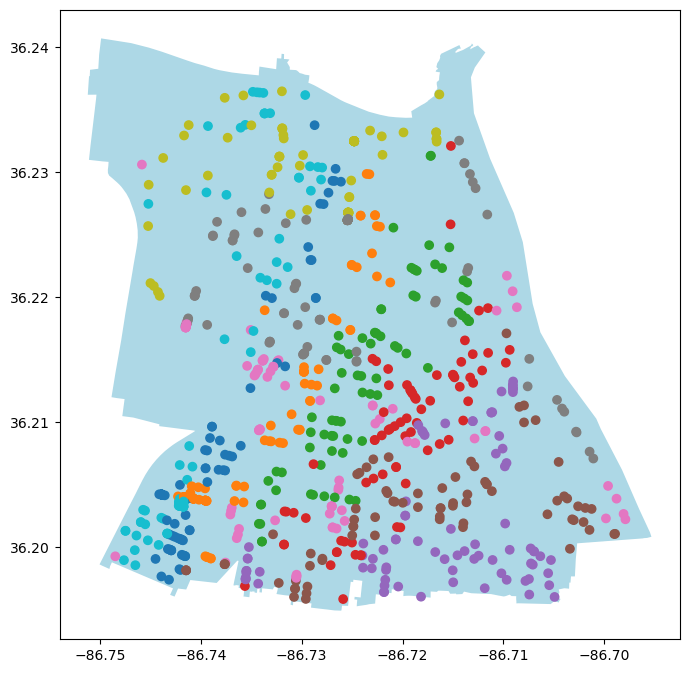

In [19]:
ax = polygon37216.plot(figsize = (8, 10), color = 'lightblue')
rentals_in_37216.plot( ax = ax, column = 'Address');
plt.show();

In [20]:
polygon37216.geometry.centroid


C:\Users\kdbai\AppData\Local\Temp\ipykernel_11804\4229726024.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37216.geometry.centroid


1    POINT (-86.72635 36.21605)
dtype: geometry

In [21]:
center = polygon37216.geometry.centroid[1]
print(center)

POINT (-86.7263455721062 36.21605012332708)


C:\Users\kdbai\AppData\Local\Temp\ipykernel_11804\4075035350.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37216.geometry.centroid[1]


In [22]:
area_center = [center.y, center.x]
print(area_center)

[36.21605012332708, -86.7263455721062]


In [23]:
map_37216 = folium.Map(location =  area_center, zoom_start = 13)
map_37216

In [24]:
i = 0
for row_index, row_values in rentals_in_37216.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 0
values are:
 
Permit #                                                             2022052402
Applicant                                                   Avery Owner 305 LLC
Contact                                                    Stay Local Nashville
Permit Subtype Description                      Short Term Rental � Multifamily
Permit Status                                                            ISSUED
Parcel                                                           061030E30100CO
Date Entered                                             08/03/2022 12:00:00 AM
Date Issued                                              08/10/2022 12:00:00 AM
Expiration Date                                          08/10/2023 12:00:00 AM
Address                                                4810  GALLATIN PIKE  305
City                                                                  NASHVILLE
State                                                                        TN
ZIP            

In [25]:
map_37216 = folium.Map(location =  area_center, zoom_start = 13)
folium.GeoJson(polygon37216).add_to(map_37216)

for row_index, row_values in rentals_in_37216.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['Address'])
    icon=folium.Icon(color="orange",icon="house", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37216)
map_37216.save('../maps/map37216.html')

In [26]:
map_37216

In [27]:
folium.Map?

In [28]:
cluster_map_37216 = folium.Map(location =  area_center, zoom_start = 13)

marker_cluster = MarkerCluster().add_to(cluster_map_37216)

folium.GeoJson(polygon37216).add_to(cluster_map_37216)


In [29]:
for row_index, row_values in rentals_in_37216.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['Address'])
    icon=folium.Icon(color="orange",icon="house", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)


In [30]:
cluster_map_37216.save('../maps/cluster37216.html')

cluster_map_37216  

In [31]:
map_37216 = folium.Map(location =  area_center, zoom_start = 13)

folium.GeoJson(polygon37216).add_to(map_37216)

locations = rentals_in_37216[['lat', 'lng']].values.tolist()
map_37216.add_child(
    FastMarkerCluster(locations)
)

map_37216